In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [4]:
train = pd.read_excel('new_data.xlsx')
train.head(70)

,Name,Director,Total Vote,Year,IMDB score,MC Score,Genre,Column1,_1
0,The Shawshank Redemption,Frank Darabont,2318407,1994,9.3,80.0,Drama,NaN,NaN
1,The Dark Knight,Christopher Nolan,2280614,2008,9.0,84.0,Action,Crime,Drama
2,Inception,Christopher Nolan,2043823,2010,8.8,74.0,Action,Adventure,Sci-Fi
3,Fight Club,David Fincher,1836556,1999,8.8,66.0,Drama,NaN,NaN
4,Pulp Fiction,Quentin Tarantino,1808737,1994,8.9,94.0,Crime,Drama,NaN
...,...,...,...,...,...,...,...,...,...
65,Gone Girl,David Fincher,849896,2014,8.1,79.0,Drama,Mystery,Thriller
66,No Country for Old Men,Ethan Coen,847206,2007,8.1,91.0,Crime,Drama,Thriller
67,A Beautiful Mind,Ron Howard,840842,2001,8.2,72.0,Biography,Drama,NaN
68,The Hunger Games,Gary Ross,839757,2012,7.2,68.0,Action,Adventure,Sci-Fi


In [5]:
print(len(train))

1000


In [6]:
train.isnull().sum().max()

278

In [7]:
train.describe()

,Total Vote,Year,IMDB score,MC Score
count,1.000000e+03,1000.000000,1000.000000,992.000000
mean,4.016538e+05,2004.020000,7.342600,66.532258
std,2.704351e+05,12.865346,0.743181,15.799608
min,1.858160e+05,1936.000000,3.800000,23.000000
25%,2.293805e+05,2000.000000,6.900000,55.000000
50%,3.070995e+05,2007.000000,7.400000,67.000000
75%,4.676580e+05,2013.000000,7.900000,79.000000
max,2.318407e+06,2020.000000,9.300000,100.000000


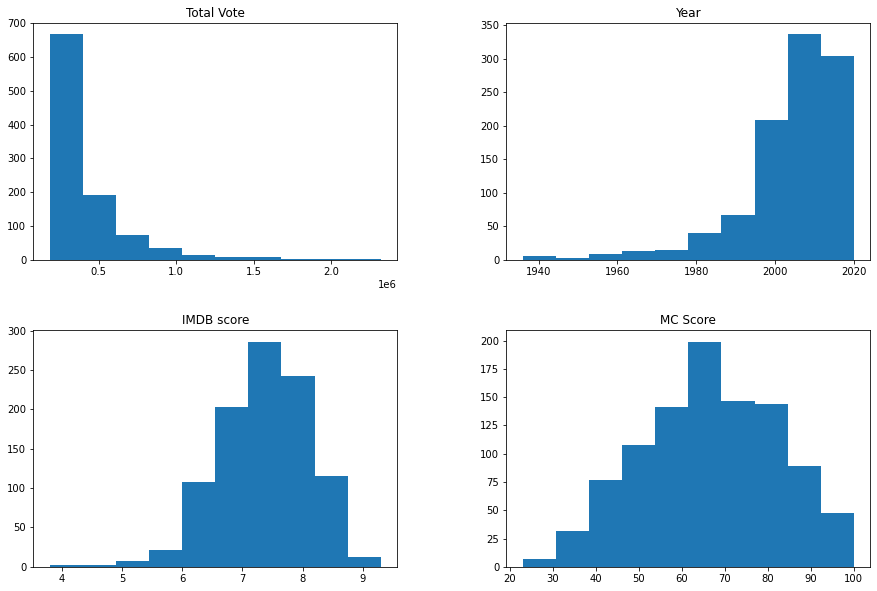

In [23]:
train.hist(bins=10,figsize=(15,10),grid= False);

Text(0, 0.5, 'Year')

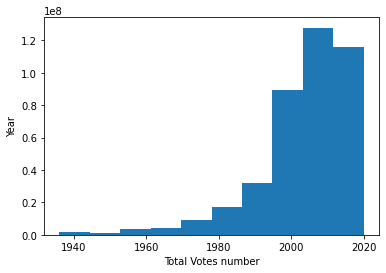

In [24]:
##分布图电影年代对比投票数
test = train["Year"].plot(kind="hist", weights=train["Total Vote"])
test.set_xlabel("Total Votes number")
test.set_ylabel("Year")

In [138]:
##找到各个种类的电影总数
test2 = train['Genre'].value_counts().rename_axis('Genre').reset_index(name='amount')
genrelist = []
print(test2)
for index, row in test2.iterrows():
    genrelist.append(row['Genre'])
print(genrelist)

                  Genre  amount
0                Action     385
1                 Drama     121
2                Comedy     116
3             Adventure      73
4             Animation      70
5                 Crime      69
6             Biography      51
7    Comedy                  35
8                Horror      27
9     Drama                  27
10              Mystery       8
11   Horror                   6
12              Fantasy       3
13  Western                   3
14               Family       2
15               Sci-Fi       2
16              Musical       1
17              Romance       1
['Action', 'Drama', 'Comedy', 'Adventure', 'Animation', 'Crime', 'Biography', 'Comedy            ', 'Horror', 'Drama            ', 'Mystery', 'Horror            ', 'Fantasy', 'Western            ', 'Family', 'Sci-Fi', 'Musical', 'Romance']


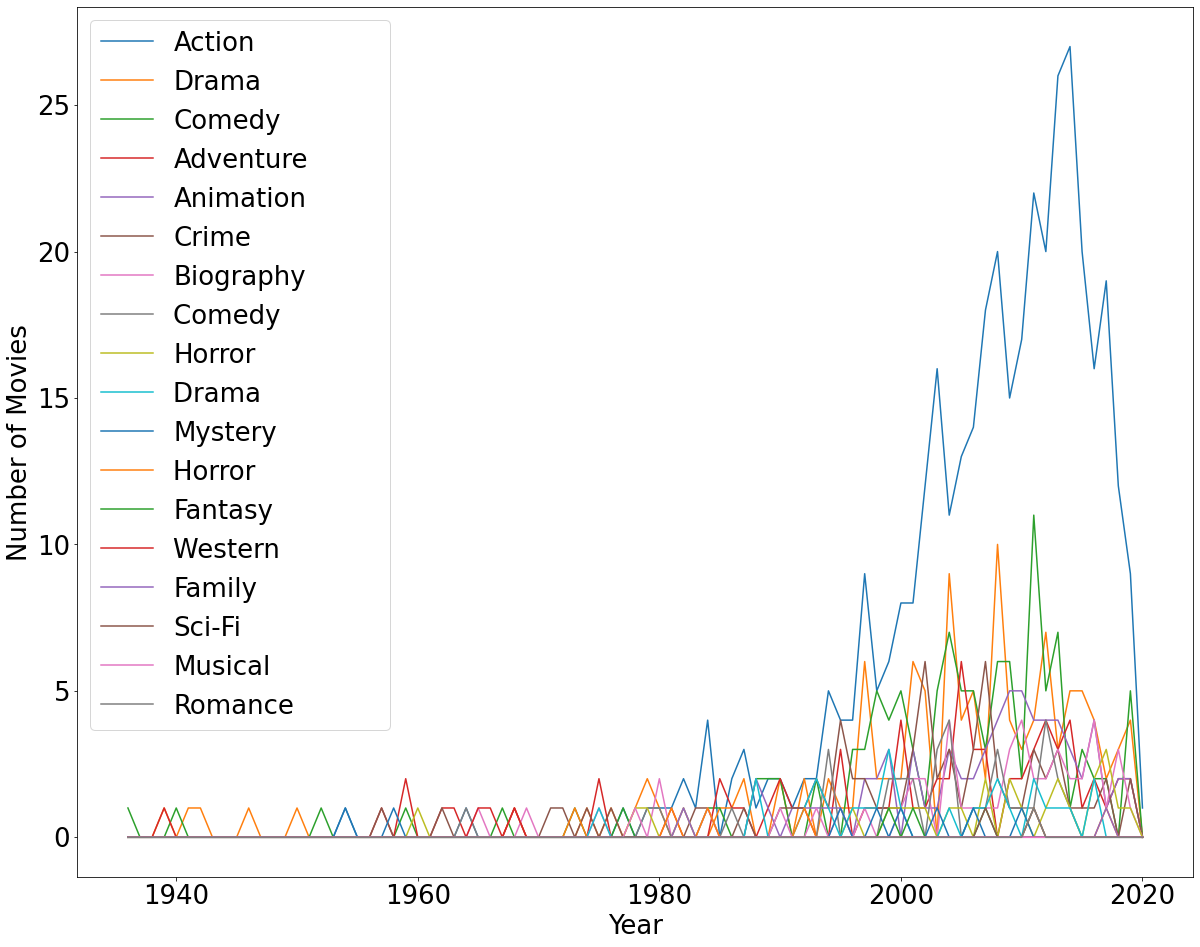

In [139]:
##找到每年每个种类的电影有多少部
indexcc = []
for ixc in range(1936,2021):
    indexcc.append(ixc)
total = len(genrelist)
ccx = []
for g in range(total):
    x = train.loc[(train['Genre'] == genrelist[g])]
    ccx.append(x['Year'].value_counts())
    
for inc in range(total):
    ccx[inc] = ccx[inc].reindex(indexcc,fill_value=0)
plt.figure()
ax = ccx[0].plot(figsize=(20, 16), fontsize=26)
for xt in range(1,total):
    ccx[xt].plot(ax=ax)
ax.legend(genrelist,fontsize=26)
ax.figsize=(10,10)
ax.set_xlabel("Year",fontsize=26)
ax.set_ylabel("Number of Movies",fontsize=26)
fig = ax.get_figure()
ax.figure.savefig('Year_vs_genrenumber.jpg')

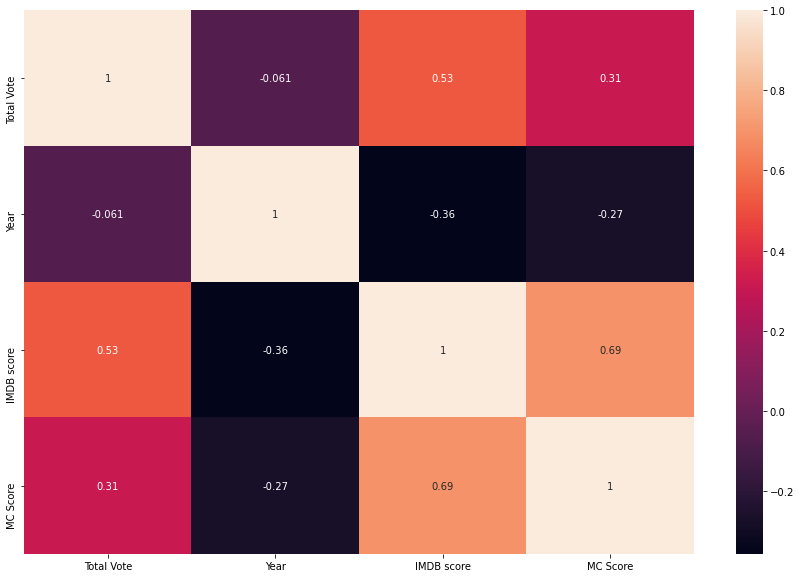

In [30]:
corr = train.corr();
plt.figure(figsize=(15,10));
ax = sns.heatmap(corr, annot=True);